# Pandas Exercises

Tamás Gál (tamas.gal@fau.de)

The latest version of this notebook is available at [https://github.com/escape2020/school2022](https://github.com/escape2020/school2022)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as ml
import sys
plt = ml.pyplot
ml.rcParams['figure.figsize'] = (10.0, 5.0)

print(f"Python version: {sys.version}\n"
      f"Pandas version: {pd.__version__}\n"
      f"NumPy version: {np.__version__}\n"
      f"Matplotlib version: {ml.__version__}\n"
      f"seaborn version: {sns.__version__}")

Python version: 3.10.5 | packaged by conda-forge | (main, Jun 14 2022, 07:06:46) [GCC 10.3.0]
Pandas version: 1.4.2
NumPy version: 1.22.4
Matplotlib version: 3.5.2
seaborn version: 0.11.2


In [2]:
from IPython.core.magic import register_line_magic

@register_line_magic
def shorterr(line):
    """Show only the exception message if one is raised."""
    try:
        output = eval(line)
    except Exception as e:
        print("\x1b[31m\x1b[1m{e.__class__.__name__}: {e}\x1b[0m".format(e=e))
    else:
        return output
    
del shorterr

In [3]:
import warnings
warnings.filterwarnings('ignore')  # annoying UserWarnings from Jupyter/seaborn which are not fixed yet

## Exercise 1

Use the `pd.read_csv()` function to create a `DataFrame` from the dataset `data/neutrinos.csv`. You will encounter a few obstacles but make sure you don't modify the raw data. It's always a good idea to open the CSV file in question in an editor and see how it's formatted.

Every column of the resulting `DataFrame` needs to have a well defined `dtype` (something other than `object`).

**Notice: energies are measured in `GeV`, distances and positions in `m`, angles in radians and time in `ns` for all of the provided datasets.**

In [40]:
neutrinos = pd.read_csv('data/neutrinos.csv', header=8, sep=':', skip_blank_lines=True, index_col=False)
neutrinos.dropna()
neutrinos.head()

,2,"4,656124692722159","2,686909147834136","0,1198429986834526","3,2335000038146973","71,722","121,449","363,077","0,8283433133732535","0,17165668662674652"
0,3,"0,5204858401306308","1,939325715443025","0,06131500005722046","4,783999919891357","-47,592","-84,466","350,687","0,8423153692614771","0,15768463073852296"
1,4,"2,8569704309044184","1,6788966833786627","0,06146499887108803","3,983299970626831","-25,518","24,362","391,891","0,8622754491017964","0,1377245508982036"
2,5,"5,519597420755324","2,2190143556767175","0,15195700526237488","4,667799949645996","31,394","59,333","398,322","0,9700598802395209","0,029940119760479042"
3,6,"6,2491579400457535","1,3309566038994414","0,3611989915370941","4,928899765014648","45,767","84,271","453,102","0,810379241516966","0,18962075848303392"
4,7,"4,732426500401594","2,2592127232704233","0,25651898980140686","4,454699993133545","-15,944","-9,902","345,65500000000003","0,8263473053892215","0,17365269461077845"


In [41]:
neutrinos = pd.read_csv('data/neutrinos.csv', skiprows=5, comment='$', sep=':', decimal=',', index_col=0,
                        skipfooter=1, engine='python')
neutrinos.head()

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd
0,2.349537,1.116004,0.048998,3.3664,52.740,28.831,401.186,0.824351,0.175649
1,5.575786,1.742838,0.280471,3.8900,48.369,29.865,417.282,0.818363,0.181637
2,4.656125,2.686909,0.119843,3.2335,71.722,121.449,363.077,0.828343,0.171657
3,0.520486,1.939326,0.061315,4.7840,-47.592,-84.466,350.687,0.842315,0.157685
4,2.856970,1.678897,0.061465,3.9833,-25.518,24.362,391.891,0.862275,0.137725


## Exercise 2

Create a histogram of the neutrino energies (`energy`).

[Text(0.5, 0, 'Neutrino energy  (GeV)'), Text(0, 0.5, 'counts')]

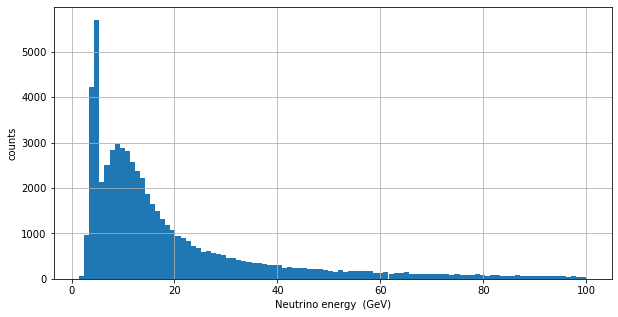

In [42]:
ax = neutrinos['energy'].hist(bins=100)
ax.set(xlabel="Neutrino energy  (GeV)", ylabel="counts")

## Exercise 3

Use the `pd.read_csv()` function to create a `DataFrame` from the dataset `data/reco.csv`. The index column should be correctly parsed too. This dataset contains the reconstructed neutrinos to each of the neutrino events in the other data file.

In [43]:
reco = pd.read_csv('data/reco.csv', index_col=0)
reco.head()

,zenith,azimuth,energy_muon,energy_neutrino,bjorken_y,quality,pos_x,pos_y,pos_z
0,1.138133,2.180345,0.291326,1.968828,0.125,-4.354237,48.916672,32.404689,-6.251441
1,1.501718,4.300291,2.247325,3.973614,0.125,-4.853344,59.164913,26.016755,12.737107
2,2.160066,4.228711,1.748958,3.390933,0.125,-3.836176,69.988323,116.081679,-35.060437
3,2.016892,0.621110,6.099985,6.643886,0.625,-4.556744,-48.878254,-86.933884,-57.699791
4,1.944401,3.030613,4.212069,5.967662,0.125,-4.927643,-32.267179,26.163239,-12.441818


## Exercise 4

Combine the `neutrinos` and `reco` `DataFrames`  into a single `DataFrame`. This way it will be easier to examine the MC and reconstruction parameters.

Hint: `pd.concat()`

In [50]:
concatenated = pd.concat([neutrinos, reco.add_prefix('reco_')], axis=1)
concatenated.head()

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd,reco_zenith,reco_azimuth,reco_energy_muon,reco_energy_neutrino,reco_bjorken_y,reco_quality,reco_pos_x,reco_pos_y,reco_pos_z
0,2.349537,1.116004,0.048998,3.3664,52.740,28.831,401.186,0.824351,0.175649,1.138133,2.180345,0.291326,1.968828,0.125,-4.354237,48.916672,32.404689,-6.251441
1,5.575786,1.742838,0.280471,3.8900,48.369,29.865,417.282,0.818363,0.181637,1.501718,4.300291,2.247325,3.973614,0.125,-4.853344,59.164913,26.016755,12.737107
2,4.656125,2.686909,0.119843,3.2335,71.722,121.449,363.077,0.828343,0.171657,2.160066,4.228711,1.748958,3.390933,0.125,-3.836176,69.988323,116.081679,-35.060437
3,0.520486,1.939326,0.061315,4.7840,-47.592,-84.466,350.687,0.842315,0.157685,2.016892,0.621110,6.099985,6.643886,0.625,-4.556744,-48.878254,-86.933884,-57.699791
4,2.856970,1.678897,0.061465,3.9833,-25.518,24.362,391.891,0.862275,0.137725,1.944401,3.030613,4.212069,5.967662,0.125,-4.927643,-32.267179,26.163239,-12.441818


## Exercise 5

Create a plot to visualise the zenith reconstruction quality (true vs. reconstructed zenith).

In case you did not complete exercise 4:

    data = pd.concat([neutrinos reco.add_prefix('reco_')], axis="columns")

<AxesSubplot:xlabel='zenith', ylabel='reco_zenith'>

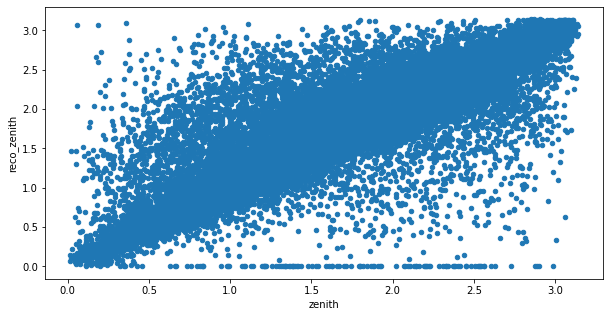

In [60]:
concatenated.plot(x='zenith', y='reco_zenith', kind='scatter')

## Exercise 6

Create a histogram of the cascade probabilities (__`neutrinos`__ dataset: `proba_cscd` column) for the energy ranges 1-5 GeV, 5-10 GeV, 10-20 GeV and 20-100 GeV.

Hint: `pd.cut()`

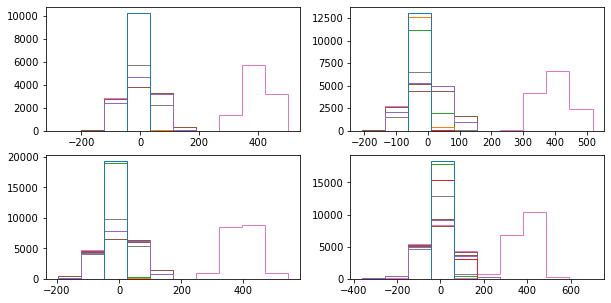

In [69]:
fig, axes = plt.subplots(2,2)
energies = [1, 5, 10, 20, 100]

for i, ax in enumerate(axes.flatten()):
    ax.hist(concatenated[(concatenated['energy'] > energies[i]) & (concatenated['energy'] < energies[i+1])], 
            histtype='step', label=f'{energies[i]}-{energies[i+1]} GeV')

## Exercise 7

Create a 2D histogram showing the distribution of the `x` and `y` values of the starting positions (`pos_x` and `pos_y`) of the neutrinos.

In [70]:
concatenated.head()

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd,reco_zenith,reco_azimuth,reco_energy_muon,reco_energy_neutrino,reco_bjorken_y,reco_quality,reco_pos_x,reco_pos_y,reco_pos_z
0,2.349537,1.116004,0.048998,3.3664,52.740,28.831,401.186,0.824351,0.175649,1.138133,2.180345,0.291326,1.968828,0.125,-4.354237,48.916672,32.404689,-6.251441
1,5.575786,1.742838,0.280471,3.8900,48.369,29.865,417.282,0.818363,0.181637,1.501718,4.300291,2.247325,3.973614,0.125,-4.853344,59.164913,26.016755,12.737107
2,4.656125,2.686909,0.119843,3.2335,71.722,121.449,363.077,0.828343,0.171657,2.160066,4.228711,1.748958,3.390933,0.125,-3.836176,69.988323,116.081679,-35.060437
3,0.520486,1.939326,0.061315,4.7840,-47.592,-84.466,350.687,0.842315,0.157685,2.016892,0.621110,6.099985,6.643886,0.625,-4.556744,-48.878254,-86.933884,-57.699791
4,2.856970,1.678897,0.061465,3.9833,-25.518,24.362,391.891,0.862275,0.137725,1.944401,3.030613,4.212069,5.967662,0.125,-4.927643,-32.267179,26.163239,-12.441818


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-357.947  , -354.19324, -350.43948, -346.68572, -342.93196,
        -339.1782 , -335.42444, -331.67068, -327.91692, -324.16316,
        -320.4094 , -316.65564, -312.90188, -309.14812, -305.39436,
        -301.6406 , -297.88684, -294.13308, -290.37932, -286.62556,
        -282.8718 , -279.11804, -275.36428, -271.61052, -267.85676,
        -264.103  , -260.34924, -256.59548, -252.84172, -249.08796,
        -245.3342 , -241.58044, -237.82668, -234.07292, -230.31916,
        -226.5654 , -222.81164, -219.05788, -215.30412, -211.55036,
        -207.7966 , -204.04284, -200.28908, -196.53532, -192.78156,
        -189.0278 , -185.27404, -181.52028, -177.76652, -174.01276,
        -170.259  , -166.50524, -162.75148, -158.99772, -155.24396,
   

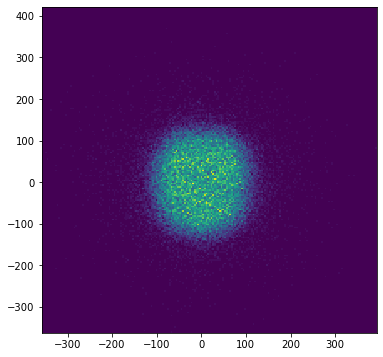

In [73]:
plt.figure(figsize=(6, 6))
plt.hist2d(concatenated['pos_x'], concatenated['pos_y'], bins=200)

## Exercise 8

Use `seaborn` (`import seaborn as sns`) to recreate the 2D histogram from Exercise 7. The functions `sns.displot()` or `sns.jointplot()` will be handy.

## Exercise 9

Create two histograms of the `azimuth` and `zenith` distribution side by side, in one plot (two subplots).

Try `pandas` built-in matplotlib wrapper and also the raw matplotlib library.

## Exercise 10

Split the data into two groups: `upgoing` and `downgoing`, based on the `zenith` value (`zenith == 0` is coming directly from above, `zenith == π` from below).

Try out `sns.stripplot` to verify your "cut" on the data!

## Exercise 11

Create a combined histogram (two histograms overlayed in the same plot) for both `upgoing` and `downgoing` datasets, showing the `zenith` angle.

## Exercise 12

Read a KM3NeT Event File (`data/hits.h5`) and examine the PMT signals (`tot`) of the hits (mean, min, max) and also the earliest hit for each digital optical module (identified by `dom_id`) separately . Create a histogram of the `tot` distribution for each module. The function `pd.read_hdf()` is a good start. The dataset path inside the HDF5 file is `/hits`.

### Exercise: Create a histogram of all time differences between consecutive hits calculated on each DOM independently

### Exercise: Examine the data for time differences below 50ns

### Exercise: examine the hits on each PMT of each DOM

Calculate the number of hits and the min/max/mean `tot` for each PMT on each DOM.